# Import Library

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [388]:
df = pd.read_csv('dataset/brain_tumor_dataset.csv')

# EDA

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [390]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [391]:
# # 1. Interaction Feature: Tumor_Size x Tumor_Growth_Rate
# if {'Tumor_Size', 'Tumor_Growth_Rate'}.issubset(df.columns):
#     df['Tumor_Size_Growth_Score'] = df['Tumor_Size'] * df['Tumor_Growth_Rate']

# # 2. Categorizing Age
# if 'Age' in df.columns:
#     df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Adult', 'Senior', 'Elder'])

# # 3. Boolean Feature: Tumor Risk (contoh: ukuran di atas rata-rata)
# if 'Tumor_Size' in df.columns:
#     avg_size = df['Tumor_Size'].mean()
#     df['High_Risk_Tumor'] = df['Tumor_Size'] > avg_size

# # 4. Count Symptoms
# symptoms = ['Symptom_1', 'Symptom_2', 'Symptom_3']
# for col in symptoms:
#     if col not in df.columns:
#         symptoms.remove(col)
# if symptoms:
#     df['Symptom_Count'] = df[symptoms].sum(axis=1)

# # 5. Ratio Feature: Growth Rate per Tumor Size
# if {'Tumor_Growth_Rate', 'Tumor_Size'}.issubset(df.columns):
#     df['Growth_per_Size'] = df['Tumor_Growth_Rate'] / (df['Tumor_Size'] + 1e-6)

# # 6. One-Hot Encoding for Categorical Feature
# categorical_cols = ['Histology', 'Location', 'Age_Group']  # tambahkan kolom lain sesuai dataset
# categorical_cols = [col for col in categorical_cols if col in df.columns]
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# # --- SELESAI ---
# # Cek hasil akhir
# print(df.head())

<Axes: xlabel='Gender'>

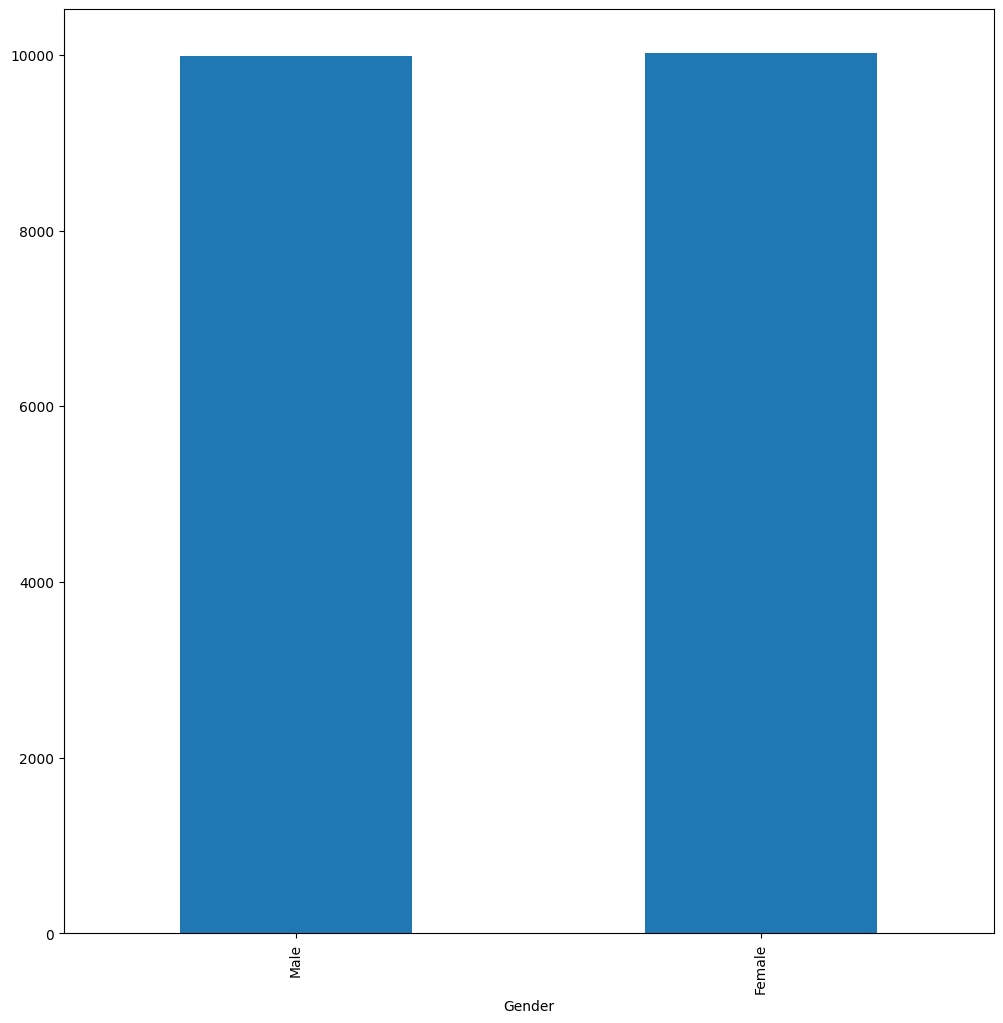

In [392]:
plt.figure(figsize=(12,12))
df.Gender.value_counts().sort_values(ascending=True).plot(kind='bar')

In [393]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [394]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [395]:
df.duplicated().sum()


np.int64(0)

In [396]:
kategorikal = df.select_dtypes(exclude='number').columns
numerikal = df.select_dtypes(include='number').columns

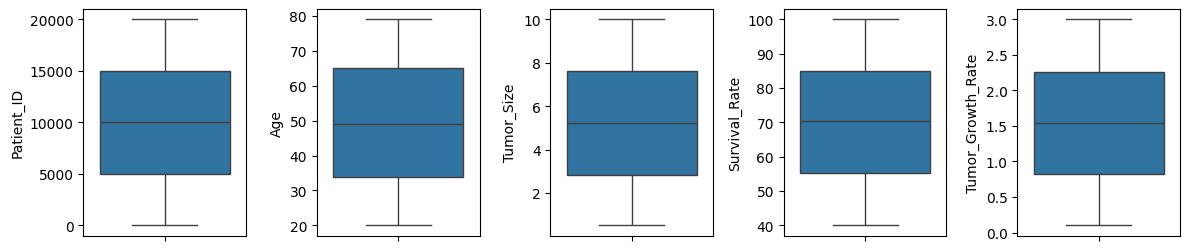

In [397]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(4, 5, i+1)
    sns.boxplot(df[col])

plt.tight_layout()

In [398]:
for col in kategorikal:
    unik = df[col].value_counts()
    print(f'data unik kolom {col}: ')
    print(unik)
    print('\n')

data unik kolom Gender: 
Gender
Female    10016
Male       9984
Name: count, dtype: int64


data unik kolom Tumor_Type: 
Tumor_Type
Malignant    10030
Benign        9970
Name: count, dtype: int64


data unik kolom Location: 
Location
Temporal     5118
Parietal     4990
Occipital    4967
Frontal      4925
Name: count, dtype: int64


data unik kolom Histology: 
Histology
Glioblastoma       5068
Meningioma         5016
Medulloblastoma    4979
Astrocytoma        4937
Name: count, dtype: int64


data unik kolom Stage: 
Stage
II     5093
I      4986
IV     4968
III    4953
Name: count, dtype: int64


data unik kolom Symptom_1: 
Symptom_1
Headache         5045
Seizures         5028
Nausea           4969
Vision Issues    4958
Name: count, dtype: int64


data unik kolom Symptom_2: 
Symptom_2
Seizures         5054
Vision Issues    5019
Headache         4996
Nausea           4931
Name: count, dtype: int64


data unik kolom Symptom_3: 
Symptom_3
Seizures         5027
Nausea           5012
Vision I

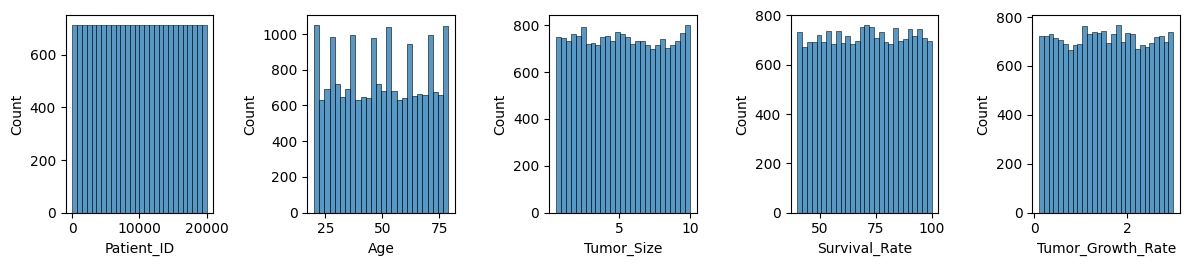

In [399]:
plt.figure(figsize=(12,10))

for i, col in enumerate(numerikal):
    plt.subplot(4, 5, i+1)
    sns.histplot(df[col])

plt.tight_layout()

<Axes: >

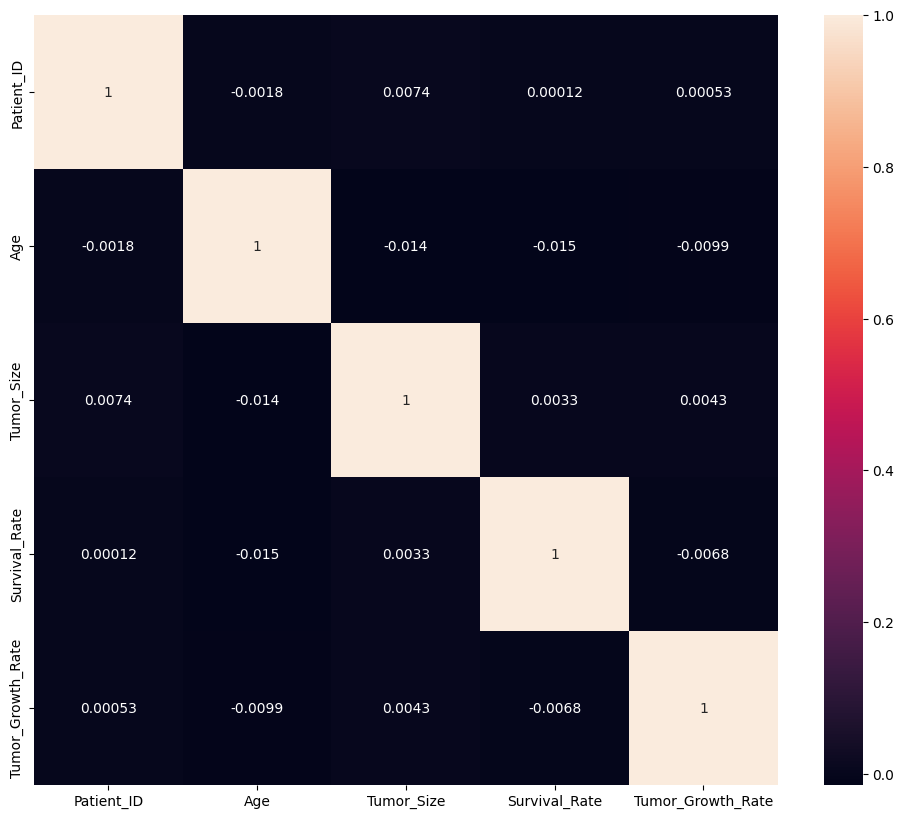

In [400]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerikal].corr(), annot=True)

# Preprocessing

## Encoding data

In [401]:
class LabelEncoder:
    def __init__(self):
        self.encode = {}
        self.decode = {}
    
    def fit(self, data):
        unik = sorted(set(data))
        self.encode = {label: index for index, label in enumerate(data)}
        self.decode = {index: label for label, index in self.encode.items()}
    
    def transform(self, data):
        return [self.encode[label] for label in data]
    
    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)
    
    def inverse_transform(self, encoded_value):
        return [self.decode[index] for label, index in encoded_value]

In [402]:
le = LabelEncoder()
for col in kategorikal:
    df[col] = le.fit_transform(df[col])

<Axes: >

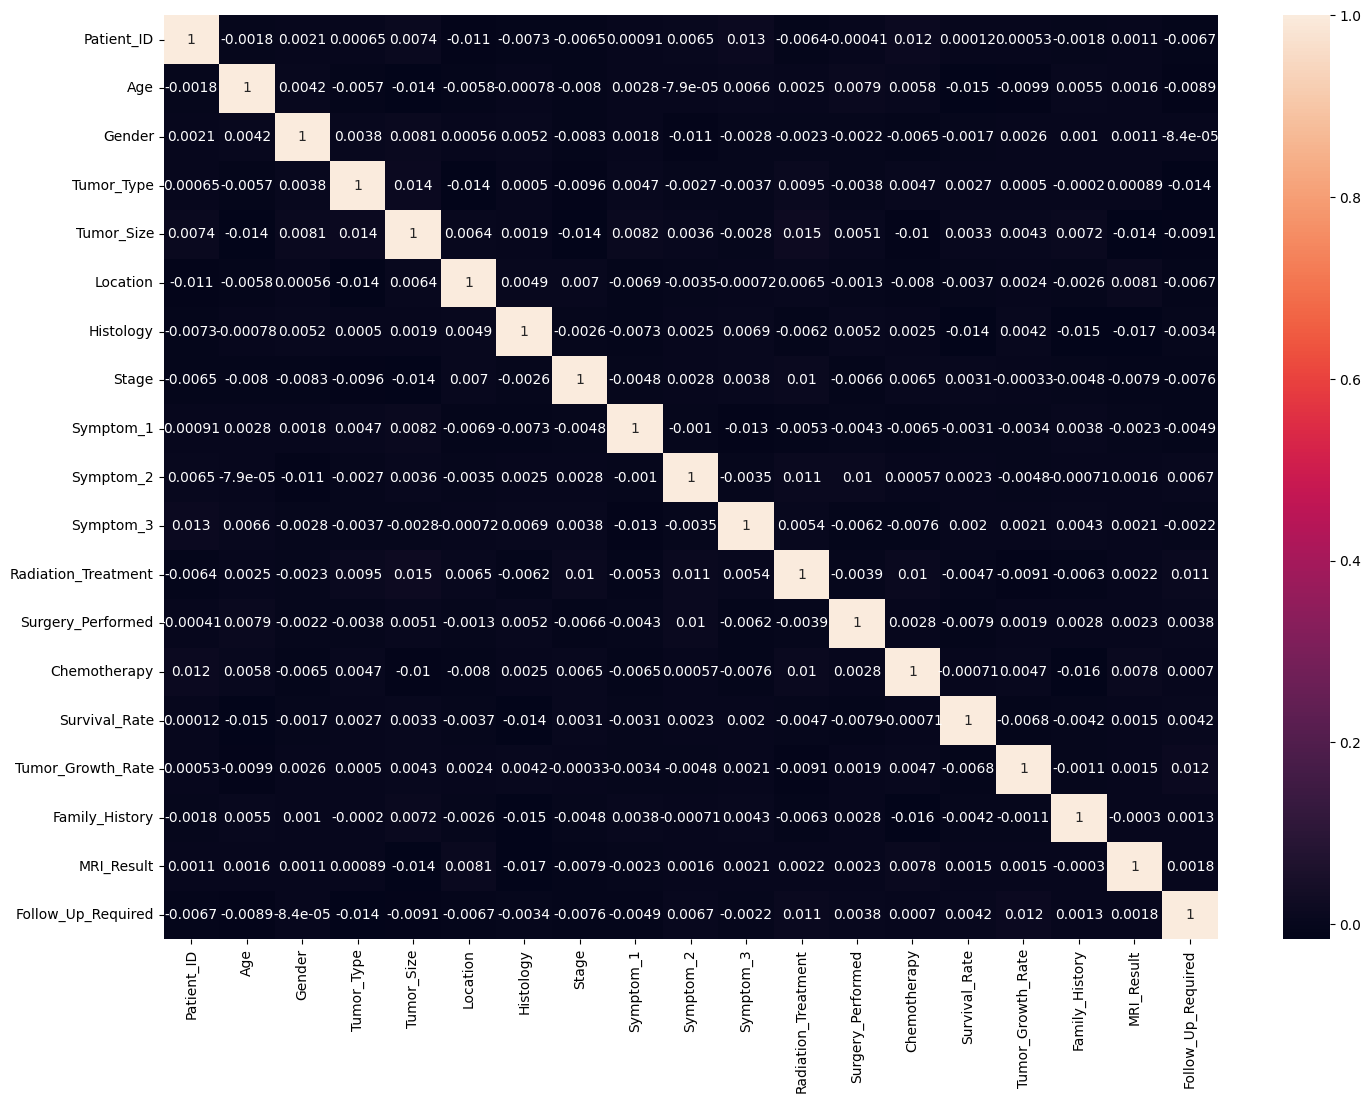

In [403]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), annot=True)

In [404]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

<Axes: >

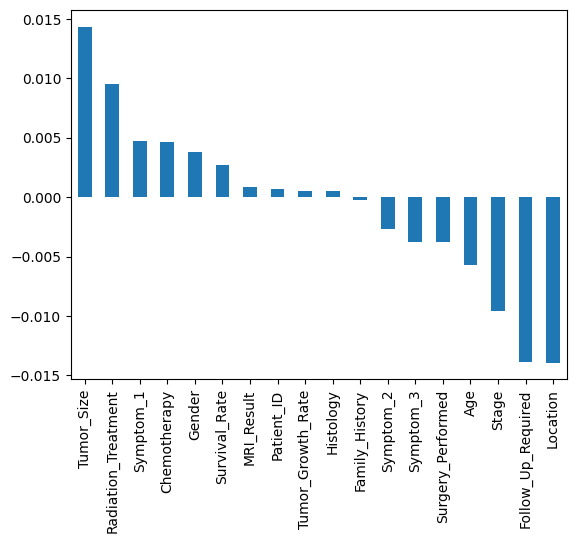

In [405]:
df.corr()['Tumor_Type'].drop('Tumor_Type').sort_values(ascending=False).plot(kind='bar')

In [406]:
df.corr()['Tumor_Type'].drop('Tumor_Type').sort_values(ascending=False)

Tumor_Size             0.014354
Radiation_Treatment    0.009494
Symptom_1              0.004710
Chemotherapy           0.004671
Gender                 0.003795
Survival_Rate          0.002703
MRI_Result             0.000891
Patient_ID             0.000651
Tumor_Growth_Rate      0.000502
Histology              0.000501
Family_History        -0.000201
Symptom_2             -0.002652
Symptom_3             -0.003742
Surgery_Performed     -0.003818
Age                   -0.005734
Stage                 -0.009586
Follow_Up_Required    -0.013870
Location              -0.013929
Name: Tumor_Type, dtype: float64

## TrainTestSplit

In [460]:
X = df[['Tumor_Size', 'Radiation_Treatment', 'Symptom_1', 'Chemotherapy', 'Gender', 'Survival_Rate', 'MRI_Result', 'Age', 'Gender']]
y = df['Tumor_Type']

In [450]:
def train_test_split(X, y, test_size, random_state):
    np.random.seed(random_state)

    total_sample = X.shape[0]
    indices = np.random.permutation(total_sample)
    split_index = int(total_sample * (1 - test_size))

    X_train = X.iloc[indices[:split_index]]
    X_test = X.iloc[indices[split_index:]]
    y_train = y.iloc[indices[:split_index]]
    y_test = y.iloc[indices[split_index:]]
    return X_train, X_test, y_train, y_test

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [452]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 8)
(4000, 8)
(16000,)
(4000,)


## Scaling Data

In [453]:
class StandartScaller:
    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        x = np.array(X)
        self.mean = np.mean(x)
        self.std = np.std(x)
        return self
    
    def transform(self, X):
        x = np.array(X)
        return (x - self.mean) / self.std
    
    def fit_transform(self, X):
        x = np.array(X)
        return self.fit(x).transform(x)

In [454]:
scaler = StandartScaller()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

In [455]:
# KNN
class KNN:
    def __init__(self, k, weight):
        self.k = k
        self.weight = weight

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        prediction = []
        for x in X_test:
            distance = np.linalg.norm(self.X_train - x, axis=1) #euclidean distance
            nearest_neighbors = np.argsort(distance)[:self.k]
            nearest_label = self.y_train[nearest_neighbors]

            if self.weight == 'uniform':
                unik_label, counts = np.unique(nearest_label, return_counts=True)
                pred = unik_label[np.argmax(counts)]
            
            elif self.weight == 'distance':
                nearest_distance = distance[nearest_neighbors]
                label_weight = {}
                for dist, label in zip(nearest_distance, nearest_label):
                    weight = 1 / (dist + 1e-5)
                    label_weight[label] = label_weight.get(weight, 0) + weight
                pred = max(label_weight.items(), key= lambda x:x[1])[0]
            prediction.append(pred)
        return prediction

    def score(self, X_test, y_test):
        X_test = np.array(X_test)
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)*100
        return accuracy

            

In [457]:
knn = KNN(k=21, weight='uniform')
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

np.float64(50.64999999999999)

In [458]:
# Elbow

def find_best_k(X_train, y_train, X_test, y_test, max_k, weights=['uniform', 'distance']):
    best_acc = 0
    best_k = None
    best_weight = None
    results = []

    for weight in weights:
        accuracy = []
        ks = list(range(1, max_k+1))

        print(f'\n weight {weight}')

        for k in ks:
            model = KNN(k=k, weight=weight)
            model.fit(X_train, y_train)
            acc = model.score(X_test, y_test)
            accuracy.append(acc)
            print(f'  k = {k} -> akurasi: {acc:.2f}%')

            if acc > best_acc:
                best_acc = acc
                best_k = k
                best_weight = weight
                
        
        #menyimpan hasil
        results.append((weight, ks, accuracy))

    
    plt.figure(figsize=(8,5))
    plt.plot(ks, accuracy, marker='o', linestyle='-', color='teal')
    plt.title('K terbaik')
    plt.xlabel('nilai k')
    plt.ylabel('akurasi')
    plt.xticks(ks)
    plt.grid(True)
    plt.show()

    print(f'\n nilai terbaik k adalah {best_k} dengan weight {best_weight} -> akurasi {best_acc:.2f}%')
    return best_k, best_weight


 weight uniform
  k = 1 -> akurasi: 50.30%
  k = 2 -> akurasi: 49.73%
  k = 3 -> akurasi: 50.88%
  k = 4 -> akurasi: 51.75%
  k = 5 -> akurasi: 52.20%
  k = 6 -> akurasi: 52.20%
  k = 7 -> akurasi: 51.35%
  k = 8 -> akurasi: 51.10%
  k = 9 -> akurasi: 50.55%
  k = 10 -> akurasi: 50.88%
  k = 11 -> akurasi: 50.55%
  k = 12 -> akurasi: 50.70%
  k = 13 -> akurasi: 50.20%
  k = 14 -> akurasi: 50.25%
  k = 15 -> akurasi: 50.32%
  k = 16 -> akurasi: 51.02%
  k = 17 -> akurasi: 50.92%
  k = 18 -> akurasi: 50.32%
  k = 19 -> akurasi: 50.48%
  k = 20 -> akurasi: 49.90%
  k = 21 -> akurasi: 50.65%
  k = 22 -> akurasi: 50.20%
  k = 23 -> akurasi: 50.92%
  k = 24 -> akurasi: 49.98%
  k = 25 -> akurasi: 50.70%
  k = 26 -> akurasi: 50.00%
  k = 27 -> akurasi: 50.45%
  k = 28 -> akurasi: 50.25%
  k = 29 -> akurasi: 50.72%
  k = 30 -> akurasi: 50.00%

 weight distance
  k = 1 -> akurasi: 50.30%
  k = 2 -> akurasi: 50.30%
  k = 3 -> akurasi: 50.72%
  k = 4 -> akurasi: 50.55%
  k = 5 -> akurasi: 49.60%

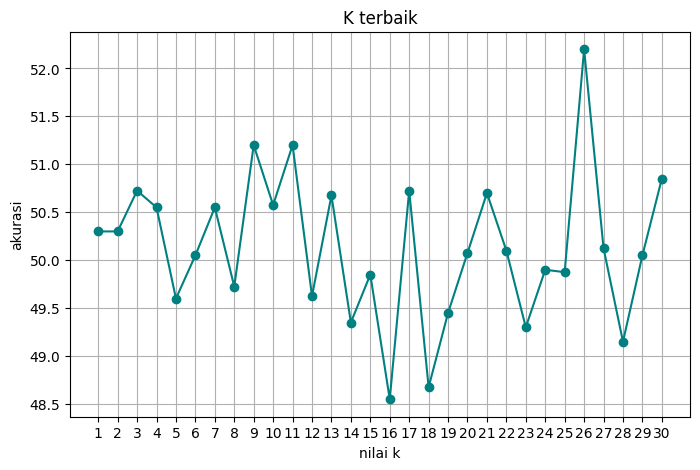


 nilai terbaik k adalah 5 dengan weight uniform -> akurasi 52.20%


In [459]:
best_k, best_weight = find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, max_k=30)